# MEDICAL EXPENDITURE MODEL 

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## READING DATA
### - Read MEPS information into a table  
### - MEPS gives us data for the civilian non-institutionalized population
### - These exclude people who were/are in the army and were/are part of an instition(nursing home, mental institute or prison)

In [3]:
datatab=pd.read_table("h192.dat",header=None,names='c')
df=pd.DataFrame() 

### - Trying to read the important features into a different dataframe to keep it more organized and increase visibility of data
### - Uncommon responses:**-9**: Not Ascertained **-8**: Don't Know **-7**: Refused **-1**: Inapplicable

### SELECTION OF FEATURES

### 1) FEATURES REPRESENTING INDIVIDUAL TRAITS/ CHARACTERISTICS
 
### These features define the uniqueness of each record. These could also be utilized to segment customers based on race, sex, region and age by health insurance companies when it comes to suggesting medical plans to the different segments of customers formed by these characteristics.

In [4]:
# Sex of the patient
# 1: males (count=16,526) 2: females (count=18,129)
# Diseases/Medical needs in men and women might be different in some cases and hence might lead to different costs incurred
df['SEX']=datatab['c'].str[186:187]
df['SEX']=pd.to_numeric(df['SEX'])

# Final weight of the person (2016)
# The weight of a person decides how important he is to the MEPS survey and hence it's necessary to add this to the model
df['PERWT16F']=datatab['c'].str[5496:5508]
df['PERWT16F']=pd.to_numeric(df['PERWT16F'])

# Census Region
# 1: Northeast 2: Midwest 3: South 4: West 
# Different regions have different living conditions and hence different environments making areas prone to a variety
# of diseases
df['REGION16']=datatab['c'].str[78:80]
df['REGION16']=pd.to_numeric(df['REGION16'])

# Age as of the survey in December 2016
# With age, a person's threshold for requirement of medical attention varies.This could be an 
# important factor in govering expenses.
df['AGE16X']=datatab['c'].str[176:178]
df['AGE16X']=pd.to_numeric(df['AGE16X'])

# Race of the person
# 1: Hispanic 2: White Only 3: Black Only 4: Asian Only 5: Other or Multiple Race
# Race can decide the genetic buildup of a person and hence how prone he is to get a disease which in turn
# increases expenses.
df['RACETHX']=datatab['c'].str[193:194]
df['RACETHX']=pd.to_numeric(df['RACETHX'])

# Income Status
# 1: Poor 2: Near Poor 3: Low Income 4: Middle Income 5: High Income
# The income status governs how open a person is to spending money for his insurance plans as well as for small
# medical needs. The worth of a dollar is higher for the poor than the rich. Income might affect the total expenditure.
df['POVCAT16']=datatab['c'].str[1650:1651]
df['POVCAT16']=pd.to_numeric(df['POVCAT16'])

# Family Income
# Family income is also an indicator of income status but keeps a check on allotting this income to children or other
# people who are part of a family but not earning. This sums the income which might be coming from multiple sources
# in a family. Amount of income in a family could potentially have a relationship with the treatment expenses for family 
# members (children, spouse, husband, father, mother etc.) of the earning party 
df['FAMINC16']=datatab['c'].str[1643:1650]
df['FAMINC16']=pd.to_numeric(df['FAMINC16'])

# Person is Key(1) or Non-key(2)
# This could be used to clean data and get rid of people not that important to the analysis
df['KEYNESS']=datatab['c'].str[147:148]
df['KEYNESS']=pd.to_numeric(df['KEYNESS'])

# How long the person was in scope
# 1: Entire period..6: Out of period
# In-scope indicator can be used to see how precise the data is to be used for the yearly expenses (TOTEXP16)
df['INSCOP16']=datatab['c'].str[147:148]
df['INSCOP16']=pd.to_numeric(df['INSCOP16'])

# Years in USA
# The immune system keeps changing with changing environment. It is very important for a person to adapt to a place. 
# Number of years lived in USA could in affect tell us how familiar a person's immunity system is with his surroundings 
# and hence how prone he is to fall ill.
df['YRSINUS']=datatab['c'].str[264:266]
df['YRSINUS']=pd.to_numeric(df['YRSINUS'])

# Marriage Status 
# 1: Married 2: Widow 3: Divorced 4: Separated 5: Never Married 6: Under 16
# A married man/woman would be having a family and might incur more expenses for family memnbers. For a woman, this 
# indicator also serves to indicate expenses related to pregnancy.
df['MARRY16X']=datatab['c'].str[202:204]
df['MARRY16X']=pd.to_numeric(df['MARRY16X'])

# Person has retired
# This is an indicator for a change in lifestyle and hence the way a person spends his money. This also could have
# implications in breaking ties with the company which might have been the health insurance provider
df['EVRETIRE']=datatab['c'].str[1411:1413]
df['EVRETIRE']=pd.to_numeric(df['EVRETIRE'])

# Total Healthcare expenditure in 2016 (in USD) [OUTPUT CLASS]
# This is the output class and gives the amount of expenditure in total for the all the medical needs a person had
# for the year 2016. 
df['TOTEXP16']=datatab['c'].str[2781:2787]
df['TOTEXP16']=pd.to_numeric(df['TOTEXP16'])

### 2) FEATURES REPRESENTING NUMBER OF VISITS AND PRESCRIPTIONS
 
### These features act to give an estimate of the total expenditure. Both of these features can be used to study the different kinds of medicines required by different patients and hence can help in targeting different segments of customers when it comes to marketing and sales of medicinal products.

In [5]:
# Total office based visits
# # This acts as a sign of how unwell a person has been throughout the year. As the number of visits increase, so does
# # the expenses incurred. 
df['OBTOTV16']=datatab['c'].str[2868:2871]
df['OBTOTV16']=pd.to_numeric(df['OBTOTV16'])

# Total outpatient visits
# Another count of visits besides office based visits
df['OPTOTV16']=datatab['c'].str[3479:3482]
df['OPTOTV16']=pd.to_numeric(df['OPTOTV16'])

# Total prescriptions
# Number of prescriptions besides increasing the expenses also show how much a person needs different medicines. 
df['RXTOT16']=datatab['c'].str[5414:5417]
df['RXTOT16']=pd.to_numeric(df['RXTOT16'])

### 3) FEATURES REPRESENTING STATUS OF A PERSON 
### These features help in indicating how susceptible a person is to getting unwell physically or mentally.

In [6]:
# Person's Health Status
# Features for 3 rounds of interviews aggregated to get an estimate of overall health condition during 
# the year since rating missing for 2016
# 1: Excellent 2: Very Good 3: Good 4: Fair 5: Poor
df['RTHLTH53']=pd.to_numeric(datatab['c'].str[288:290])+pd.to_numeric(datatab['c'].str[286:288])+pd.to_numeric(datatab['c'].str[284:286])
df['RTHLTH53']=pd.to_numeric(df['RTHLTH53'])

# Person's Mental Status
# Features for 3 rounds of interviews aggregated to get an estimate of overall health condition during 
# the year since rating missing for 2016
# 1: Excellent 2: Very Good 3: Good 4: Fair 5: Poor
df['MNHLTH53']=pd.to_numeric(datatab['c'].str[290:292])+pd.to_numeric(datatab['c'].str[292:294])+pd.to_numeric(datatab['c'].str[294:296])
df['MNHLTH53']=pd.to_numeric(df['MNHLTH53'])

### 4) FEATURES REPRESENTING DISEASES
### These features could be used to target customer segments suffering from different diseases by companies. They can help in making different health insurance plans for these segments. For the prediction, this data is useful since these diseases increase the expenditure which could vary based on the disease. As an example a person suffering from cancer might be have a much more expensive treatment going on than one who is suffering from fever

In [7]:

# Cancer Diagnosed
# 1: Yes 0: No
df['CANCERDX']=datatab['c'].str[334:336]
df['CANCERDX']=pd.to_numeric(df['CANCERDX'])

# High Blood Pressure
# 1: Yes 0: No
df['HIBPDX']=datatab['c'].str[296:298]
df['HIBPDX']=pd.to_numeric(df['HIBPDX'])

# Heart Attack
# 1: Yes 0: No
df['MIDX']=datatab['c'].str[310:312]
df['MIDX']=pd.to_numeric(df['MIDX'])

# Chronic Bronchitis Last 12 Months
# 1: Yes 0: No
df['CHBRON53']=datatab['c'].str[328:330]
df['CHBRON53']=pd.to_numeric(df['CHBRON53'])

# Stroke Diagnosis
# 1: Yes 0: No
df['STRKDX']=datatab['c'].str[318:320]
df['STRKDX']=pd.to_numeric(df['STRKDX'])

# Diabetes Diagnosis
# 1: Yes 0: No
df['DIABDX']=datatab['c'].str[360:362]
df['DIABDX']=pd.to_numeric(df['DIABDX'])

# Arthritis Diagnosis
# 1: Yes 0: No
df['ARTHDX']=datatab['c'].str[368:370]
df['ARTHDX']=pd.to_numeric(df['ARTHDX'])

# Asthma Diagnosis
# 1: Yes 0: No
df['ASTHDX']=datatab['c'].str[374:376]
df['ASTHDX']=pd.to_numeric(df['ASTHDX'])

# ADHDADD Diagnosis
# 1: Yes 0: No
df['ADHDADDX']=datatab['c'].str[404:406]
df['ADHDADDX']=pd.to_numeric(df['ADHDADDX'])

### 1) PREPROCESSING DATA
### Some features can be used to preprocess data. Real world data like in this case generally lacks attribute values, certain attributes of interest, maybe noisy and sometimes is inconsistent. Attributes like eligibility, weight per person and total expenses can be used to remove unimportant data points


In [8]:

# Eligibility
# 1: Eligible 3: Non-eligible
df['ELGRND16']=datatab['c'].str[157:158]
df['ELGRND16']=pd.to_numeric(df['ELGRND16'])


# Number of months for data
# This acts to generalize the data for 12 months in all the cases irrespective of how long they were active in the survey
df['ENDFRM16']=datatab['c'].str[141:143]
df['ENDFRM16']=pd.to_numeric(df['ENDFRM16'])
df['ENDFRM16']=df['ENDFRM16']/12

# Data in which we get a zero expenditure value most likely are examples for which data was either wrongly or incompletely
# collected> These are removed so that the model can predict correctly based on relevant data.
df2=df[df['TOTEXP16']>0]

# Making Total Expenses to expenses in 12 months accross all data points in case the person's data was for <12 months
df2['TOTEXP16'].divide(df2['ENDFRM16'])

# Preprocessing data and cleaning up data points which weren't eligible or whose weight was 0.
df2=df2[df2['PERWT16F']>0]
df2=df2.drop(columns=['PERWT16F'])
df2=df2[df2['ELGRND16']==1]
df2=df2.drop(columns=['ELGRND16'])

# The variable 'jab' here categorizes total expenses
jab=[1 if x<4000 else(2 if x>=4000 and x<=12000 else (3 if x>12000 and x<=24000 else(4 if x>24000 and x<=48000                            else (5 if x>48000 else 6)))) for x in df2['TOTEXP16']]
# The variable 'cab' here categorizes age into different groups
cab=[1 if x<=4 and x>0 else(2 if x>4 and x<=17 else(3 if x>17 and x<65 else 4)) for x in df2['AGE16X']]

# Changing integer valued attributes to categorical attributes
df2.insert(df2.shape[1],'TOTCAT16',jab)
df2=df2.drop(columns=['TOTEXP16'])
df2.insert(3,'AGECAT16X',cab) 
df2=df2.drop(columns=['AGE16X']) 

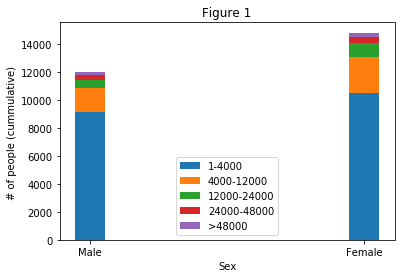

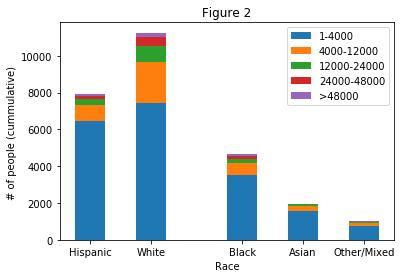

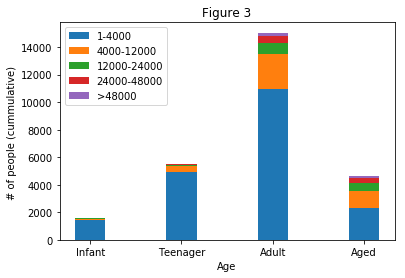

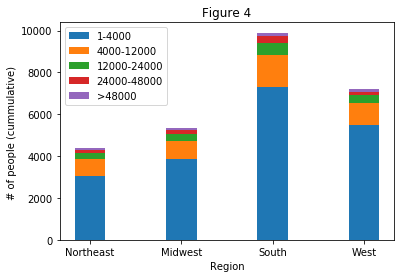

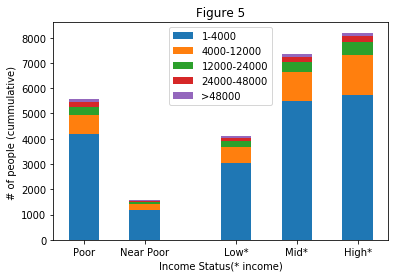

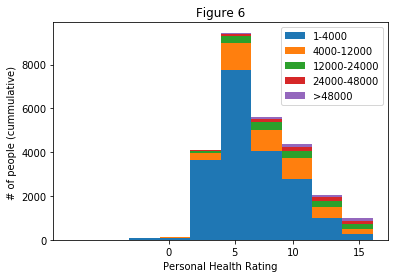

In [10]:
import matplotlib.pyplot as plt
cats=['1-4000','4000-12000','12000-24000','24000-48000','>48000']
plt.hist([df2['SEX'][df2['TOTCAT16']==1],df2['SEX'][df2['TOTCAT16']==2],df2['SEX'][df2['TOTCAT16']==3],df2['SEX'][df2['TOTCAT16']==4],df2['SEX'][df2['TOTCAT16']==5]],stacked=True,label=cats)
plt.xlabel('Sex')
plt.ylabel('# of people (cummulative) ')
plt.xticks([1.05, 1.95],['Male','Female'])
plt.legend()
plt.title('Figure 1')
plt.show()


# In[12]:


# Categorical distribution based on Race

cats=['1-4000','4000-12000','12000-24000','24000-48000','>48000']
plt.hist([df2['RACETHX'][df2['TOTCAT16']==1],df2['RACETHX'][df2['TOTCAT16']==2],df2['RACETHX'][df2['TOTCAT16']==3],df2['RACETHX'][df2['TOTCAT16']==4],df2['RACETHX'][df2['TOTCAT16']==5]],stacked=True,label=cats)
plt.xlabel('Race')
plt.ylabel('# of people (cummulative) ')
plt.xticks([1.2, 2,3.2,4,4.8],['Hispanic','White','Black','Asian','Other/Mixed'])
plt.legend()
plt.title('Figure 2')
plt.show()


# In[13]:


# Categorical distribution based on Age

cats=['1-4000','4000-12000','12000-24000','24000-48000','>48000']
plt.hist([df2['AGECAT16X'][df2['TOTCAT16']==1],df2['AGECAT16X'][df2['TOTCAT16']==2],df2['AGECAT16X'][df2['TOTCAT16']==3],df2['AGECAT16X'][df2['TOTCAT16']==4],df2['AGECAT16X'][df2['TOTCAT16']==5]],stacked=True,label=cats)
plt.xlabel('Age')
plt.ylabel('# of people (cummulative) ')
plt.xticks([1.15, 2.05,2.95,3.85],['Infant','Teenager','Adult','Aged'])
plt.legend()
plt.title('Figure 3')
plt.show()


# In[14]:


# Categorical distribution based on Region

cats=['1-4000','4000-12000','12000-24000','24000-48000','>48000']
plt.hist([df2['REGION16'][df2['TOTCAT16']==1],df2['REGION16'][df2['TOTCAT16']==2],df2['REGION16'][df2['TOTCAT16']==3],df2['REGION16'][df2['TOTCAT16']==4],df2['REGION16'][df2['TOTCAT16']==5]],stacked=True,label=cats)
plt.xlabel('Region')
plt.ylabel('# of people (cummulative) ')
plt.xticks([1.15, 2.05,2.95,3.85],['Northeast','Midwest','South','West'])
plt.legend()
plt.title('Figure 4')
plt.show()


# In[15]:


# Categorical distribution based on Income Status

cats=['1-4000','4000-12000','12000-24000','24000-48000','>48000']
plt.hist([df2['POVCAT16'][df2['TOTCAT16']==1],df2['POVCAT16'][df2['TOTCAT16']==2],df2['POVCAT16'][df2['TOTCAT16']==3],df2['POVCAT16'][df2['TOTCAT16']==4],df2['POVCAT16'][df2['TOTCAT16']==5]],stacked=True,label=cats)
plt.xlabel('Income Status(* income)')
plt.ylabel('# of people (cummulative) ')
plt.xticks([1.2, 2,3.2,4,4.8],['Poor','Near Poor','Low*','Mid*','High*'])
plt.legend()
plt.title('Figure 5')
plt.show()


# In[16]:


# Categorical distribution based on Personal Health

cats=['1-4000','4000-12000','12000-24000','24000-48000','>48000']
plt.hist([df2['RTHLTH53'][df2['TOTCAT16']==1],df2['RTHLTH53'][df2['TOTCAT16']==2],df2['RTHLTH53'][df2['TOTCAT16']==3],df2['RTHLTH53'][df2['TOTCAT16']==4],df2['RTHLTH53'][df2['TOTCAT16']==5]],stacked=True,label=cats)
plt.xlabel('Personal Health Rating')
plt.ylabel('# of people (cummulative) ')
plt.xticks([0.25, 5,9.25,14],['0','5','10','15'])
plt.legend()
plt.title('Figure 6')
plt.show()

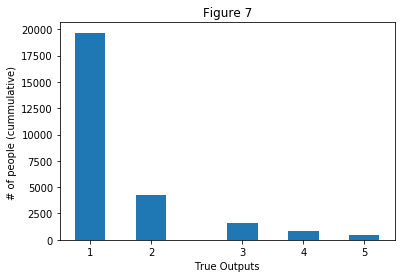

In [11]:
cats=['1-4000','4000-12000','12000-24000','24000-48000','>48000']
plt.hist(np.array(df2)[:,-1],stacked=True,label=cats)
plt.xlabel('True Outputs')
plt.ylabel('# of people (cummulative) ')
plt.xticks([1.2, 2,3.2,4,4.8],['1','2','3','4','5'])
plt.title('Figure 7')
plt.show() 